### Brief preview of rapaio features

This notebook is intended to be a starting point for using rapaio library in a IJava jupyter notebook. While we use as a toy example a real data set, the analysis it is not indended to be an example for how to conduct an inference. The line story poresented exists only to make the exemplification more friendly.

#### Set up things

First of all we have to import the library. We can do that either through maven magic or, if we have a locally compiled project source code, through jar magic. We will use maven magic here, since it is portable. 

In [1]:
%maven io.github.padreati:rapaio:2.0.0

We now have to import some useful packages, so we can use the provided features. The import section below provides an extensive import section, though not complete. It can be used as a starting point for a new notebook.

In [2]:
import rapaio.core.*;
import rapaio.core.correlation.*;
import rapaio.core.distributions.*;
import rapaio.core.tests.*;
import rapaio.core.tools.*;
import rapaio.core.stat.*;
import rapaio.data.*;
import rapaio.data.filter.*;
import rapaio.data.filter.var.*;
import rapaio.data.filter.frame.*;
import rapaio.data.group.*;
import rapaio.data.unique.*;
import rapaio.datasets.*;
import static rapaio.graphics.Plotter.*;
import rapaio.io.*;
import rapaio.ml.regression.linear.*;
import rapaio.sys.*;

In [3]:
// establish some convenient default sizes (in pixels) for printer
WS.getPrinter().withTextWidth(100);
WS.getPrinter().withGraphicShape(800, 400);

rapaio.printer.standard.StandardPrinter@4bebd4d6

#### Use a data set

We load a well known small data set used in the wonderful book: *An Introduction to Statistical Learning with Applications in R, Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani*. This is the 
[book's website](http://faculty.marshall.usc.edu/gareth-james/ISL/index.html).

In [4]:
// skip the first column since it is the row number
var df = Csv.instance().withSkipCols(0)
    .read(new URL("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv").openStream());

Take a look at some of the data frame values.

In [5]:
df.printContent();

       TV   radio newspaper sales        TV   radio newspaper sales        TV   radio newspaper sales 
  [0] 230.1 37.8    69.2    22.1    [6]  57.5 32.8    23.5    11.8  [196]  94.2  4.9     8.1     9.7  
  [1]  44.5 39.3    45.1    10.4    [7] 120.2 19.6    11.6    13.2  [197] 177    9.3     6.4    12.8  
  [2]  17.2 45.9    69.3     9.3    [8]   8.6  2.1     1       4.8  [198] 283.6 42      66.2    25.5  
  [3] 151.5 41.3    58.5    18.5    [9] 199.8  2.6    21.2    10.6  [199] 232.1  8.6     8.7    13.4  
  [4] 180.8 10.8    58.4    12.9         ...   ...     ...     ...  
  [5]   8.7 48.9    75       7.2  [195]  38.2  3.7    13.8     7.6  



And see some statistics on the data frame.

In [6]:
df.printSummary();

Frame Summary
* rowCount: 200
* complete: 200/200
* varCount: 4
* varNames: 

0.        TV : double | 
1.     radio : double | 
2. newspaper : double | 
3.     sales : double | 

               TV             radio          newspaper             sales 
   Min. :   0.700     Min. :  0.000     Min. :   0.300     Min. :  1.600 
1st Qu. :  74.375  1st Qu. :  9.975  1st Qu. :  12.750  1st Qu. : 10.375 
 Median : 149.750   Median : 22.900   Median :  25.750   Median : 12.900 
   Mean : 147.043     Mean : 23.264     Mean :  30.554     Mean : 14.022 
2nd Qu. : 218.825  2nd Qu. : 36.525  2nd Qu. :  45.100  2nd Qu. : 17.400 
   Max. : 296.400     Max. : 49.600     Max. : 114.000     Max. : 27.000 
                                                                         



#### Data exploration

Let's see how *Sales* variable visually looks like.

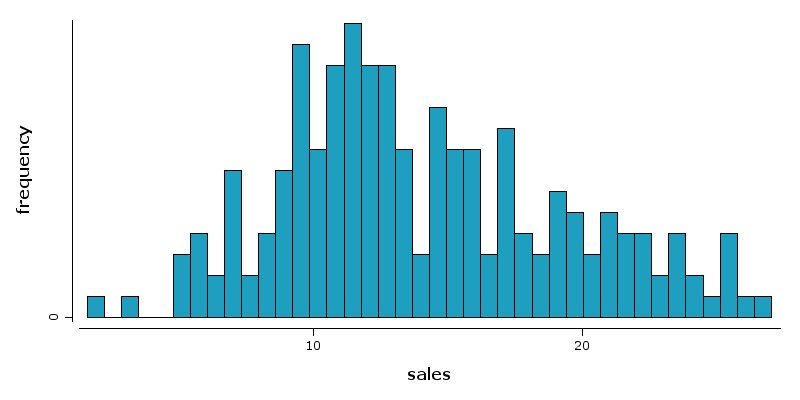

In [7]:
WS.image(hist(df.rvar("sales"), bins(40), color(6)), 800, 400);

Let's look at the relation between DVs and IV.

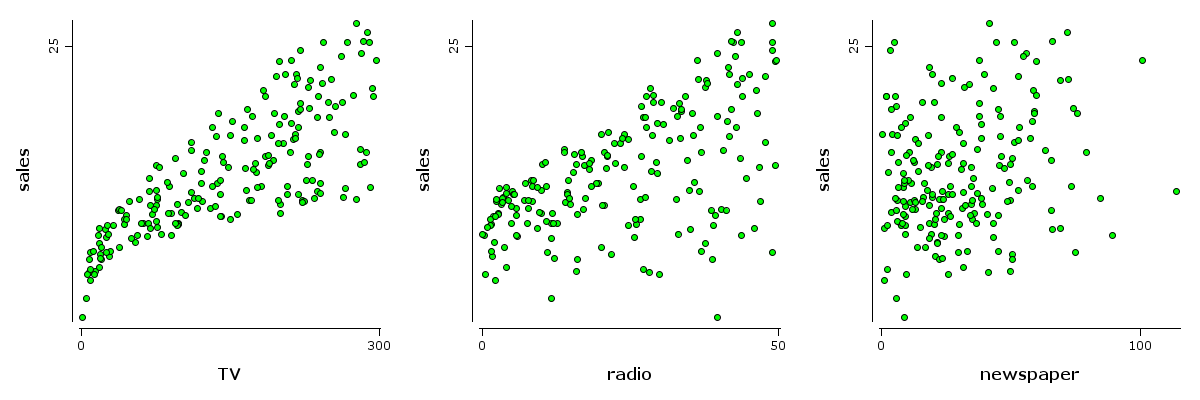

In [8]:
WS.image(gridLayer(1,3)
         .add(points(df.rvar("TV"), df.rvar("sales"), pch(2), color(3)))
         .add(points(df.rvar("radio"), df.rvar("sales"), pch(2), color(3)))
         .add(points(df.rvar("newspaper"), df.rvar("sales"), pch(2), color(3))),
1200, 400);

We have an idea that *TV* and *radio* are correlated with *sales*. First we can check if this is true. We can do that by measuring the correlation between them.

In [9]:
CorrPearson.of(df.rvar("TV"), df.rvar("sales")).printContent();

> pearson[TV, sales] - Pearson product-moment correlation coefficient
0.7822244



In [10]:
CorrSpearman.of(df.rvar("TV"), df.rvar("sales")).printContent();

> spearman[TV, sales] - Spearman's rank correlation coefficient
0.8006144



As expected, the correlation is strong and a little bit unlinear. This is probably to be expected.

In [11]:
CorrPearson.of(df.rvar("radio"), df.rvar("sales")).printContent();

> pearson[radio, sales] - Pearson product-moment correlation coefficient
0.5762226



In [12]:
CorrSpearman.of(df.rvar("radio"), df.rvar("sales")).printContent();

> spearman[radio, sales] - Spearman's rank correlation coefficient
0.5543037



Correlation is lower, as expected from the visualization. However, it must be higher than the *newspaper*.

In [13]:
CorrPearson.of(df.rvar("newspaper"), df.rvar("sales")).printContent()

> pearson[newspaper, sales] - Pearson product-moment correlation coefficient
0.228299



#### TV and radio

It seems obvious that *TV* and *radio* dependent variables have a strong influence on sales. It becomes interesting to understand if those contributions are strongly correlated or not. If they are correlated, than our predictive power would be probably lower because the two variables would share the same information. If they are relatively independent, than our prediction would be better, since the information space would be spanned into more than one important dimension. 

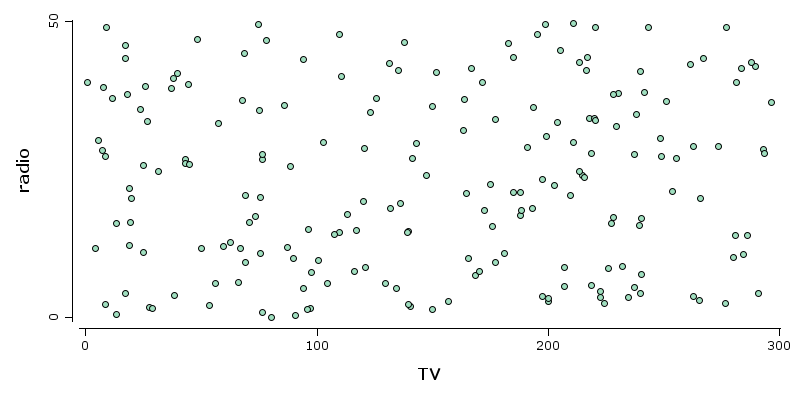

In [14]:
WS.image(points(df.rvar("TV"), df.rvar("radio"), color(23), pch(2)))

They look unrelated.

In [15]:
CorrPearson.of(df.rvar("TV"), df.rvar("radio")).printContent();
CorrSpearman.of(df.rvar("TV"), df.rvar("radio")).printContent();

> pearson[TV, radio] - Pearson product-moment correlation coefficient
0.0548087

> spearman[TV, radio] - Spearman's rank correlation coefficient
0.0561234



We were right, even Spearman's rho could not get much of it.

#### Linear regression

In [19]:
LinearRegressionModel lm = LinearRegressionModel.newLm();
lm.fit(df, "sales");
lm.predict(df, true).printSummary();

Regression predict summary
Model class: LinearRegression
Model instance: LinearRegression(intercept=true)
> model is trained.
> input variables: 
1. (Intercept) double 
2. TV          double 
3. radio       double 
4. newspaper   double 
> target variables: 
1. sales double 

Target <<< sales >>>

> Residuals: 
       Min         1Q    Median        3Q       Max 
-8.8276871 -0.8908135 0.2418018 1.1893186 2.8292226 

> Coefficients: 
       Name  Estimate Std. error   t value  P(>|t|)     
(Intercept)  2.938889  0.311908   9.422288   <2e-16 *** 
TV           0.045765  0.001395  32.808624   <2e-16 *** 
radio        0.188530  0.008611  21.893496   <2e-16 *** 
newspaper   -0.001037  0.005871  -0.176715 0.859915     
--------
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.6855104 on 196 degrees of freedom
Multiple R-squared:  0.8972106, Adjusted R-squared:  0.8956373
F-statistic: 570.271 on 3 and 196 DF,  p-value: <2e-16




The linear regression tells us that our intuitions are right regarding the importance of *TV* and *radio* and aparently less important *newspaper*. It says also that both of them are important on their own right, being independent.
